<h3>Hydrogen Wavefunctions</h3>

Wavefunction modeling and probability-density plotting

In [1]:
# Author: Sebastian M
# https://github.com/cmd098/hydrogen-wavefunctions

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#### 1. Describing a radial function

<img src='https://github.com/cmd098/hydrogen-wavefunctions/raw/main/images/radial.jpg' width=450 align="left"/>

In [3]:
# Rnl(r) normalized radial function

def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)

    return np.sqrt(
        ((2 / n * a0) ** 3 * (np.math.factorial(n - l - 1))) / (2 * n * (np.math.factorial(n + l)))
    ) * np.exp(-p / 2) * (p ** l) * laguerre(p)

#### 2. Describing an angular function

<img src='https://github.com/cmd098/hydrogen-wavefunctions/raw/main/images/angular.jpg' width=420 align="left"/>

In [4]:
# Ylm(θ,φ) normalized angular function

def angular_function(l, m, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))

    return ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * np.math.factorial(l - np.abs(m)))
        / (4 * np.pi * np.math.factorial(l + np.abs(m)))) * legendre * np.real(np.exp(1.j * m * phi))

#### 3. Describing the wavefunction as a whole

<img src='https://github.com/cmd098/hydrogen-wavefunctions/raw/main/images/normalized_wf.jpg' width=500 align="left"/>

In [5]:
# Solving the wavefunction and producing its probability density
# by definition of quantum numbers n, l, m and bohr radius

def plot_wavefunction(n, l, m, a0):    
    x_points = np.linspace(-480, 480, 680)
    y_points = x_points
    x, y = np.meshgrid(x_points, y_points)

    # Ψ(r,θ,φ) = R(r)Y(θ,φ)
    psi = radial_function(n, l, np.sqrt((x ** 2 + y ** 2)), a0) * angular_function(l, m, np.arctan(x / (y + 1e-10)), 0)

    # |Ψ|^2 probability density
    prob_density = np.abs(psi) ** 2

    # Plot
    plt.figure(figsize = (8, 6))
    plt.title('Hydrogen wavefunction probability density', fontsize = 15, pad = 20)
    plt.text(25, 50, f'{n, l, m}', fontsize = 14, color = 'white')
    plt.text(780, 25, '+', fontsize = 18)
    plt.text(780, 690, '−', fontsize = 18)
    plt.text(790, 560, 'Electron probability distribution', rotation = 'vertical', fontsize = 14)
        
    prob_density = np.sqrt(prob_density)
    plt.imshow(prob_density, cmap = 'magma')
    cbar = plt.colorbar()
    cbar.set_ticks([])
    
    # plt.savefig(f'wavefunction{n,l,m}.png')
    plt.show()
    

#### 4. Result: producing a visual representation of probability

In [6]:
# Light shaded areas represent a high probability of a particle (electron) being present in that region

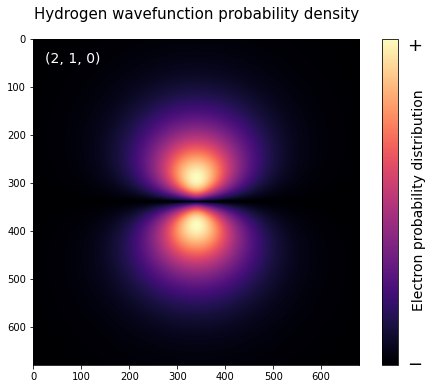

In [7]:
plot_wavefunction(2, 1, 0, 35)

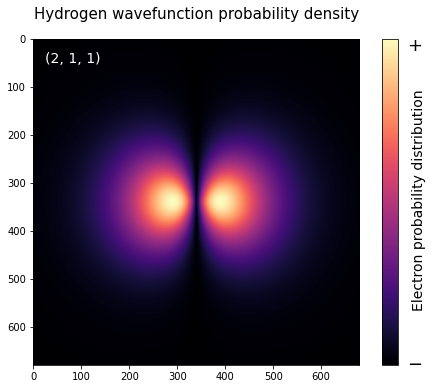

In [8]:
plot_wavefunction(2, 1, 1, 35)

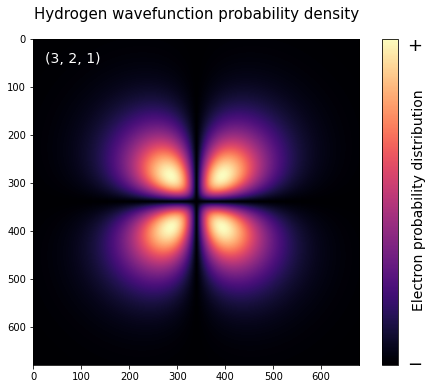

In [9]:
plot_wavefunction(3, 2, 1, 18)

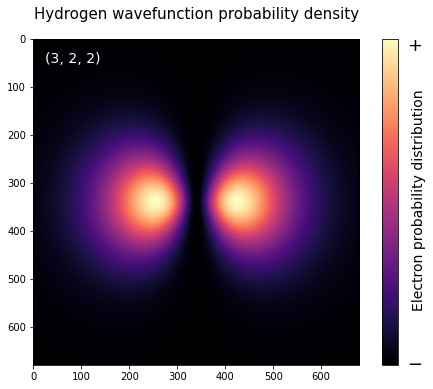

In [10]:
plot_wavefunction(3, 2, 2, 20)

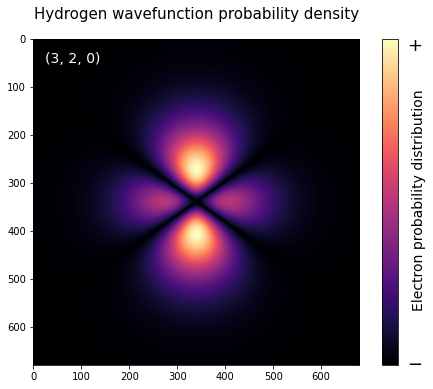

In [11]:
plot_wavefunction(3, 2, 0, 16)

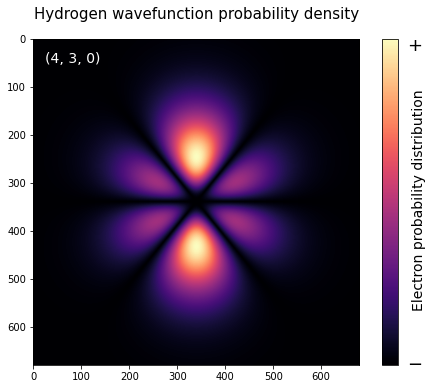

In [12]:
plot_wavefunction(4, 3, 0, 11)

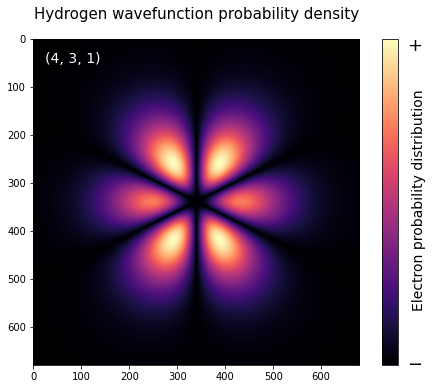

In [13]:
plot_wavefunction(4, 3, 1, 11)

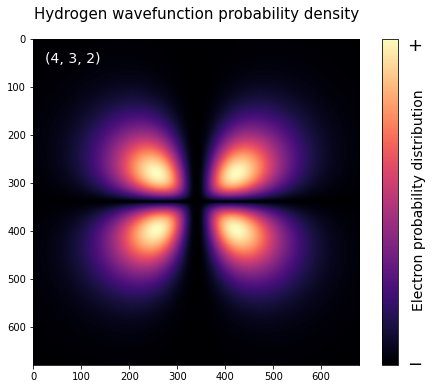

In [14]:
plot_wavefunction(4, 3, 2, 12)

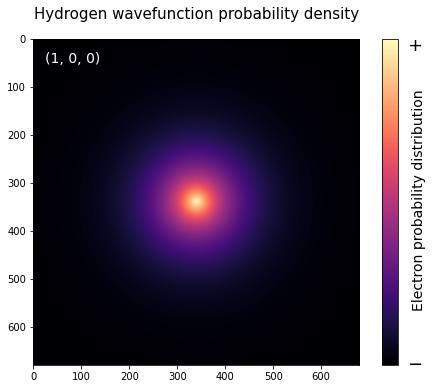

In [15]:
plot_wavefunction(1, 0, 0, 100)